In [4]:
# !pip install yfinance
# !conda install scikit-learn

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import sklearn
from datetime import datetime

# 1. Data Collection

In [6]:
# ?https://finance.yahoo.com/quote/GOOG/
now = datetime.now()

start = datetime(now.year-10, now.month, now.day)
end = now
ticker = 'AAPL'
df = yf.download(ticker, start, end)
df

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-04-23,28.958897,29.126392,28.617206,28.652939,183083600
2015-04-24,29.095129,29.173295,28.860634,29.142029,178103600
2015-04-27,29.624416,29.731616,29.289425,29.548486,387816800
2015-04-28,29.157654,30.046497,28.936562,30.028634,475696000
2015-04-29,28.728870,29.387686,28.652940,29.068329,253544400
...,...,...,...,...,...
2025-04-15,202.139999,203.509995,199.800003,201.860001,51343900
2025-04-16,194.270004,200.699997,192.369995,198.360001,59732400


In [7]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-04-23,28.958897,29.126392,28.617206,28.652939,183083600
2015-04-24,29.095129,29.173295,28.860634,29.142029,178103600
2015-04-27,29.624416,29.731616,29.289425,29.548486,387816800
2015-04-28,29.157654,30.046497,28.936562,30.028634,475696000
2015-04-29,28.728870,29.387686,28.652940,29.068329,253544400


In [8]:
df.tail()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2025-04-15,202.139999,203.509995,199.800003,201.860001,51343900
2025-04-16,194.270004,200.699997,192.369995,198.360001,59732400
2025-04-17,196.979996,198.830002,194.419998,197.199997,51334300
2025-04-21,193.160004,193.800003,189.809998,193.270004,46742500
2025-04-22,199.740005,201.589996,195.970001,196.119995,52660200


# 2. Data Exploration & Visualization

In [9]:
df

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-04-23,28.958897,29.126392,28.617206,28.652939,183083600
2015-04-24,29.095129,29.173295,28.860634,29.142029,178103600
2015-04-27,29.624416,29.731616,29.289425,29.548486,387816800
2015-04-28,29.157654,30.046497,28.936562,30.028634,475696000
2015-04-29,28.728870,29.387686,28.652940,29.068329,253544400
...,...,...,...,...,...
2025-04-15,202.139999,203.509995,199.800003,201.860001,51343900
2025-04-16,194.270004,200.699997,192.369995,198.360001,59732400


In [10]:
type(df)

pandas.core.frame.DataFrame

In [11]:
df.shape

(2515, 5)

In [12]:
df.isna().sum()

Price   Ticker
Close   AAPL      0
High    AAPL      0
Low     AAPL      0
Open    AAPL      0
Volume  AAPL      0
dtype: int64

In [13]:
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
count,2515.000000,2515.000000,2515.000000,2515.000000,2.515000e+03
mean,100.100453,101.105071,98.987829,100.003041,1.123708e+08
std,68.271379,68.943291,67.508198,68.189975,6.555688e+07
min,20.674530,20.978908,20.475430,20.596724,2.323470e+07
25%,37.159752,37.507959,36.734300,37.154399,6.874540e+07
50%,76.653259,77.366894,75.655577,76.570380,9.645210e+07
75%,159.105911,160.826151,156.794368,158.613192,1.367109e+08
max,258.735504,259.814335,257.347047,257.906429,6.488252e+08


In [14]:
df.dtypes

Price   Ticker
Close   AAPL      float64
High    AAPL      float64
Low     AAPL      float64
Open    AAPL      float64
Volume  AAPL        int64
dtype: object

In [15]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-04-23,28.958897,29.126392,28.617206,28.652939,183083600
2015-04-24,29.095129,29.173295,28.860634,29.142029,178103600
2015-04-27,29.624416,29.731616,29.289425,29.548486,387816800
2015-04-28,29.157654,30.046497,28.936562,30.028634,475696000
2015-04-29,28.728870,29.387686,28.652940,29.068329,253544400


In [16]:
df = df.reset_index()

In [17]:
df.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2015-04-23,28.958897,29.126392,28.617206,28.652939,183083600
1,2015-04-24,29.095129,29.173295,28.860634,29.142029,178103600
2,2015-04-27,29.624416,29.731616,29.289425,29.548486,387816800
3,2015-04-28,29.157654,30.046497,28.936562,30.028634,475696000
4,2015-04-29,28.728870,29.387686,28.652940,29.068329,253544400


Text(0, 0.5, 'Close price')

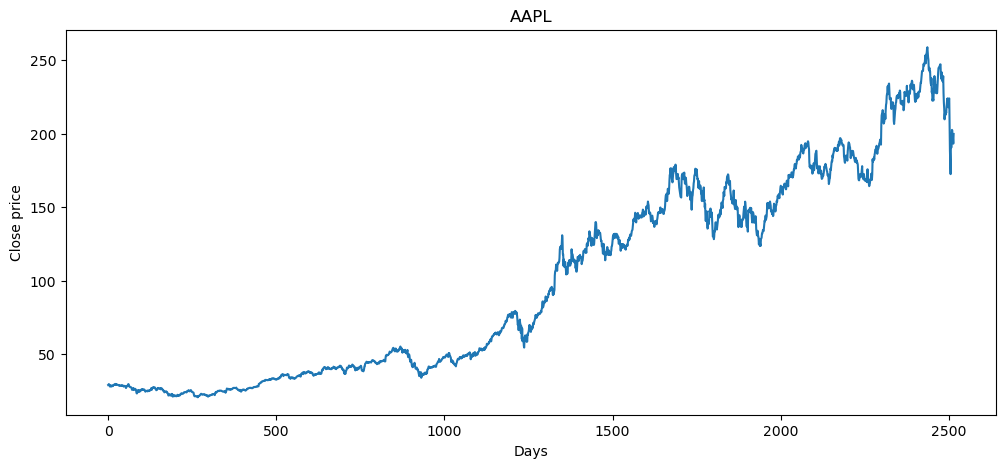

In [18]:
plt.figure(figsize=(12, 5))
plt.plot(df.Close)
plt.title(ticker)
plt.xlabel('Days')
plt.ylabel('Close price')

# 3. Feature Engineering

In [19]:
# 10, 20, 30, 40, 50, 60, 70, 80, 90, 100

# MA of 5 days ==> null null null null 30 40


In [20]:
temp_df = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
print(sum(temp_df[2:7])/5)

50.0


In [21]:
df1 = pd.DataFrame([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
df1

,0
0,10
1,20
2,30
3,40
4,50
5,60
6,70
7,80
8,90
9,100


In [22]:
df1['MA_5'] = df1.rolling(5).mean()
df1

,0,MA_5
0,10,NaN
1,20,NaN
2,30,NaN
3,40,NaN
4,50,30.0
5,60,40.0
6,70,50.0
7,80,60.0
8,90,70.0
9,100,80.0


### 100 days Moving Average

In [23]:
df['MA_100'] = df.Close.rolling(100).mean()
df.head()

Price,Date,Close,High,Low,Open,Volume,MA_100
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,
0,2015-04-23,28.958897,29.126392,28.617206,28.652939,183083600,NaN
1,2015-04-24,29.095129,29.173295,28.860634,29.142029,178103600,NaN
2,2015-04-27,29.624416,29.731616,29.289425,29.548486,387816800,NaN
3,2015-04-28,29.157654,30.046497,28.936562,30.028634,475696000,NaN
4,2015-04-29,28.728870,29.387686,28.652940,29.068329,253544400,NaN


In [24]:
df.head(103)

Price,Date,Close,High,Low,Open,Volume,MA_100
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,
0,2015-04-23,28.958897,29.126392,28.617206,28.652939,183083600,NaN
1,2015-04-24,29.095129,29.173295,28.860634,29.142029,178103600,NaN
2,2015-04-27,29.624416,29.731616,29.289425,29.548486,387816800,NaN
3,2015-04-28,29.157654,30.046497,28.936562,30.028634,475696000,NaN
4,2015-04-29,28.728870,29.387686,28.652940,29.068329,253544400,NaN
...,...,...,...,...,...,...,...
98,2015-09-11,25.728729,25.728729,25.176805,25.183563,199662000,NaN
99,2015-09-14,25.976540,26.332476,25.875166,26.262641,233453600,27.618246
100,2015-09-15,26.195051,26.251370,25.776038,26.116205,173364800,27.590607


Text(0, 0.5, 'Price')

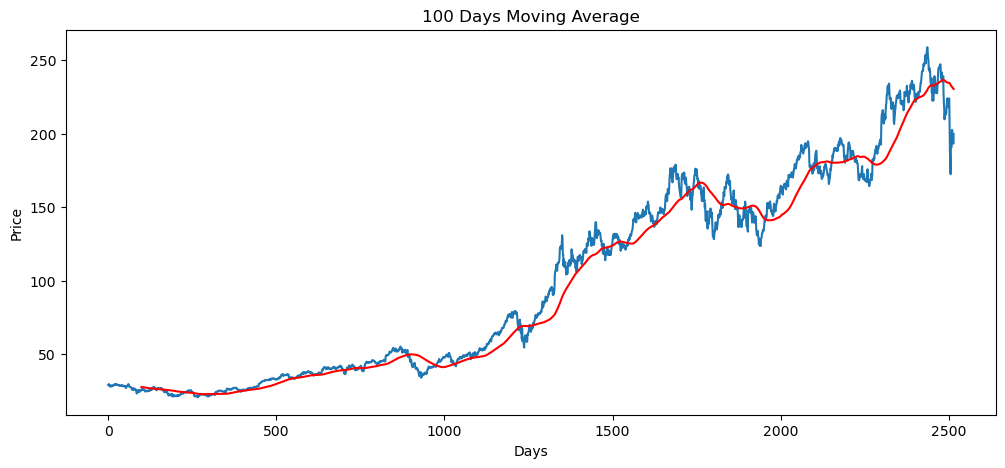

In [25]:
plt.figure(figsize=(12, 5))
plt.plot(df.Close)
plt.plot(df['MA_100'], 'r')
plt.title('100 Days Moving Average')
plt.xlabel('Days')
plt.ylabel('Price')

### 200 days Moving Average ===> Same as 100 days

### Calculating % changed in each trading session

In [26]:
df['Percentage Chaged'] = df.Close.pct_change()
df[['Close', 'Percentage Chaged']]

Price,Close,Percentage Chaged
Ticker,AAPL,
0,28.958897,NaN
1,29.095129,0.004704
2,29.624416,0.018192
3,29.157654,-0.015756
4,28.728870,-0.014706
...,...,...
2510,202.139999,-0.001876
2511,194.270004,-0.038933
2512,196.979996,0.013950


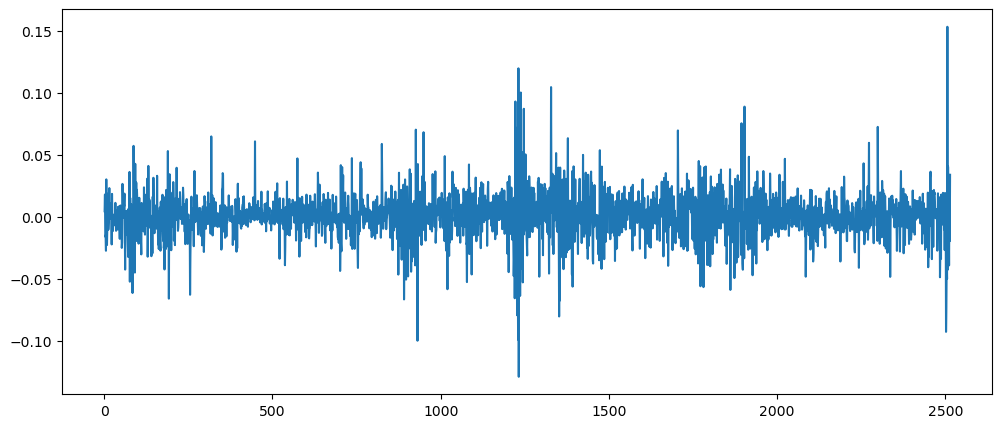

In [27]:
plt.figure(figsize=(12, 5))
plt.plot(df['Percentage Chaged'])

# 4. Data Preprocessing

In [28]:
# Splitting data into Training & Testing datasets
data_training = pd.DataFrame(df.Close[0:int(len(df)*0.7)])
data_testing = pd.DataFrame(df.Close[int(len(df)*0.7): int(len(df))])

print(data_training)
print(data_testing)

Ticker        AAPL
0        28.958897
1        29.095129
2        29.624416
3        29.157654
4        28.728870
...            ...
1755    163.107101
1756    164.986633
1757    167.682922
1758    162.654388
1759    162.437927

[1760 rows x 1 columns]
Ticker        AAPL
1760    164.730759
1761    164.563461
1762    163.766388
1763    159.210236
1764    160.282852
...            ...
2510    202.139999
2511    194.270004
2512    196.979996
2513    193.160004
2514    199.740005

[755 rows x 1 columns]


In [29]:
type(data_training)

pandas.core.frame.DataFrame

In [30]:
# Scaling down the data between 0 and 1

In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [32]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.05236462],
       [0.05322573],
       [0.0565713 ],
       ...,
       [0.92922479],
       [0.89743995],
       [0.89607172]])

In [33]:
type(data_training_array)

numpy.ndarray

In [34]:
data_training_array.shape

(1760, 1)

# 5. Sequence Creation

In [35]:
# 12, 15, 10, 14, 16, 18, 19, 20, 21, 20      22

In [36]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])


x_train, y_train = np.array(x_train), np.array(y_train)

In [37]:
x_train

array([[[0.05236462],
        [0.05322573],
        [0.0565713 ],
        ...,
        [0.02961182],
        [0.03194707],
        [0.03351345]],

       [[0.05322573],
        [0.0565713 ],
        [0.05362094],
        ...,
        [0.03194707],
        [0.03351345],
        [0.03489464]],

       [[0.0565713 ],
        [0.05362094],
        [0.05091065],
        ...,
        [0.03351345],
        [0.03489464],
        [0.03507978]],

       ...,

       [[0.85003737],
        [0.86668625],
        [0.86960596],
        ...,
        [0.92729687],
        [0.9003015 ],
        [0.91218183]],

       [[0.86668625],
        [0.86960596],
        [0.87202857],
        ...,
        [0.9003015 ],
        [0.91218183],
        [0.92922479]],

       [[0.86960596],
        [0.87202857],
        [0.87532115],
        ...,
        [0.91218183],
        [0.92922479],
        [0.89743995]]])

In [38]:
y_train

array([0.03489464, 0.03507978, 0.03153411, ..., 0.92922479, 0.89743995,
       0.89607172])

In [39]:
x_train.shape

(1660, 100, 1)

In [40]:
y_train.shape

(1660,)

In [41]:
x_train.ndim

3

In [42]:
# !pip install tensorflow-macos

# 6. Model Building

In [43]:
import tensorflow as tf
print(tf.__version__)

2.16.2


In [44]:
!python3 --version

Python 3.10.16


In [45]:
# ML Model
from keras.models import Sequential
from keras.layers import Dense, LSTM, Input

In [46]:
model = Sequential()

model.add(Input(shape=(100, 1)))
model.add(LSTM(units=128, activation='tanh', return_sequences=True))
model.add(LSTM(units=64))
model.add(Dense(25))
model.add(Dense(1))

# 7. Model Training

In [47]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 85ms/step - loss: 0.0242
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - loss: 6.1932e-04 
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 14s 280ms/step - loss: 4.4196e-04
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 117ms/step - loss: 4.6412e-04
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 110ms/step - loss: 4.8440e-04
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 121ms/step - loss: 4.0566e-04
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 120ms/step - loss: 4.5014e-04
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 137ms/step - loss: 4.1916e-04
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 143ms/step - loss: 3.9415e-04
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 133ms/step - loss: 3.8526e-04
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 114ms/step - loss: 3.5744e-04
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 9s 179ms/step - loss: 3.6991e-04 
Epoch 13/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 142ms/step - loss: 3.4096e-04 
Epoch 14/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 145ms/step - loss: 3.1101e-04 
Ep

In [ ]:
model.summary()

In [ ]:
# Save the trained model
model.save('stock_prediction_model.keras')

# 8. Preparing Test Data